In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt

from torch.utils.data import Dataset, DataLoader
import numpy as np
torch.manual_seed(2)

In [2]:
# create the model class using sigmoid as te activation function

class Net(nn.Module):
    
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
        
    # prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

In [3]:
# create the model class using tanh as activation function

class NetTanh(nn.Module):
    
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
        
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

In [4]:
# create the model class using relu as activation function

class NetRelu(nn.Module):
    
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
        
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
# train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    
    for epoch in range(epochs):
        for i, (x,y) in enumerate (train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28))
            loss = criterion(z,y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
            
        correct = 0
        for x,y in validation_loader:
            z = model(x.view(-1, 28*28))
            _, label = torch.max(z,1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct/len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
        
    return useful_stuff

In [6]:
train_dataset = dsets.MNIST(root = './data', train=True, download=True, transform=transforms.ToTensor())

In [7]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [8]:
criterion = nn.CrossEntropyLoss()

In [9]:
train_loader = DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [10]:
input_dim = 28*28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

In [11]:
# train the model using sigmoid function

learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=10)

In [12]:
# train the model using tanh function
learning_rate = 0.01
model_tanh = NetTanh(input_dim, hidden_dim1,hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_tanh.parameters(), lr=learning_rate)
training_results_tanh = train(model_tanh, criterion, train_loader, validation_loader, optimizer, epochs=10)

In [14]:
# train the model with relu function
learning_rate = 0.01
model_relu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_relu.parameters(), lr=learning_rate)
training_results_relu = train(model_relu, criterion, train_loader, validation_loader, optimizer, epochs=10)

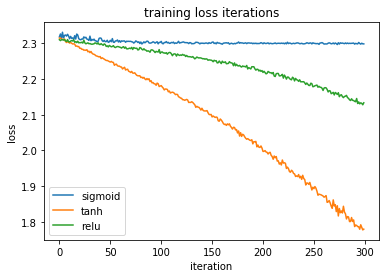

In [15]:
# compare the training loss

plt.plot(training_results['training_loss'], label = 'sigmoid')
plt.plot(training_results_tanh['training_loss'], label = 'tanh')
plt.plot(training_results_relu['training_loss'], label = 'relu')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.title('training loss iterations')
plt.legend()
plt.show()

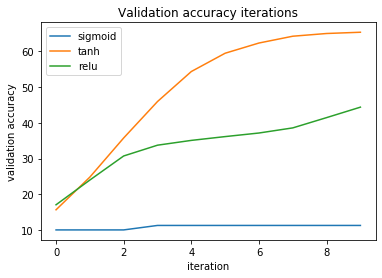

In [16]:
# compare the validation accuracy

plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_tanh['validation_accuracy'], label = 'tanh')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu')
plt.ylabel('validation accuracy')
plt.xlabel('iteration')
plt.title('Validation accuracy iterations')
plt.legend()
plt.show()